In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
# some preprocessing
#1 dropping unnamed column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [12]:
#2 column Ram, Weight
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

# converting the datatype of above columns
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

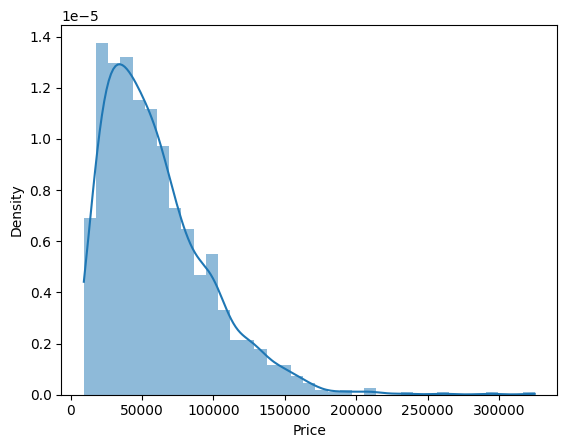

In [317]:
# EDA
# Both univariate and bivariate
sns.histplot(df['Price'],kde=True,stat="density",linewidth=0)

<AxesSubplot:xlabel='Price', ylabel='Count'>

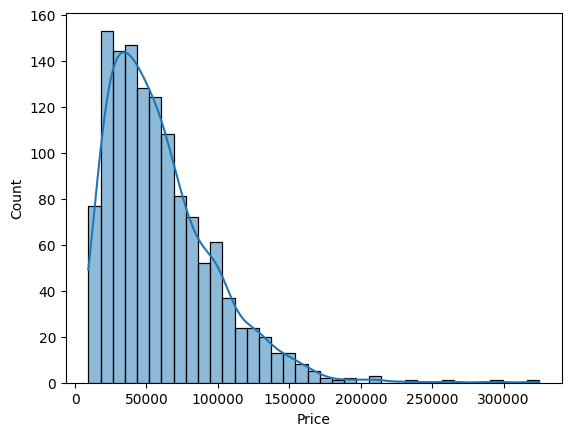

In [318]:
sns.histplot(data=df,x='Price',kde=True)

<AxesSubplot:>

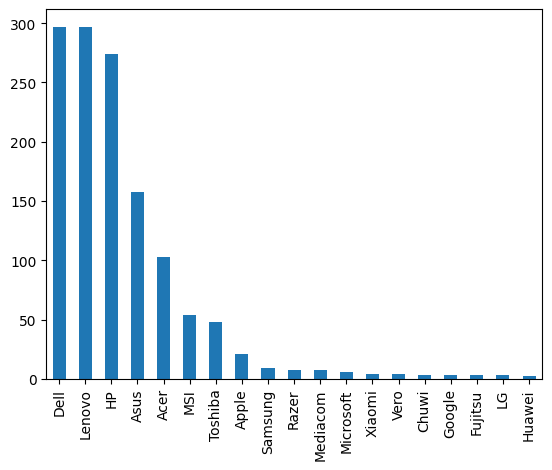

In [319]:
df['Company'].value_counts().plot(kind='bar')

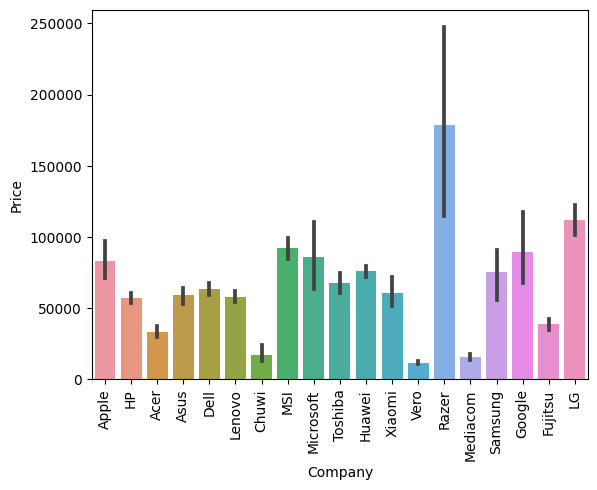

In [320]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

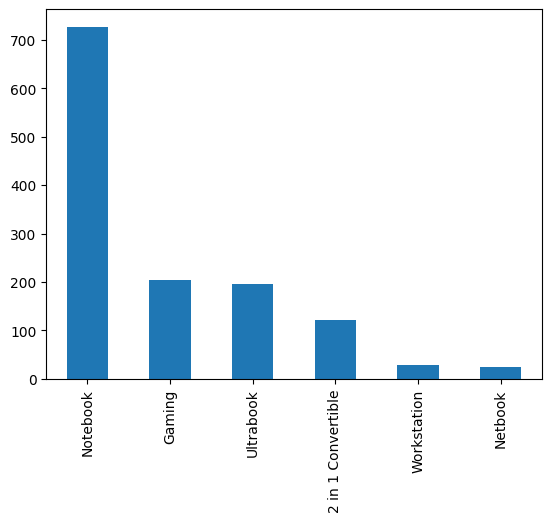

In [321]:
df['TypeName'].value_counts().plot(kind='bar')

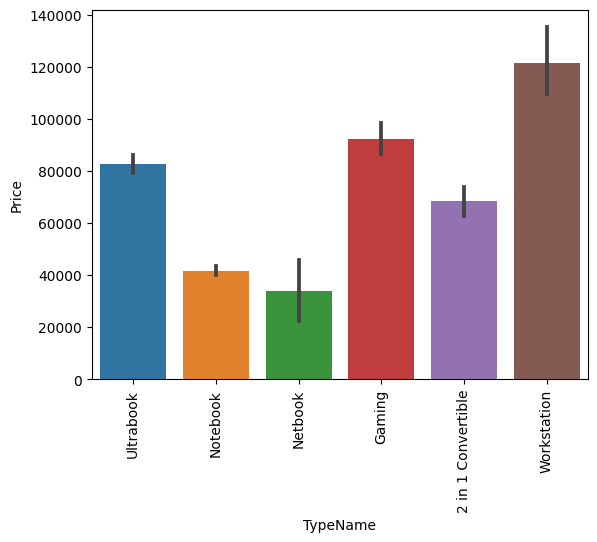

In [322]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Density'>

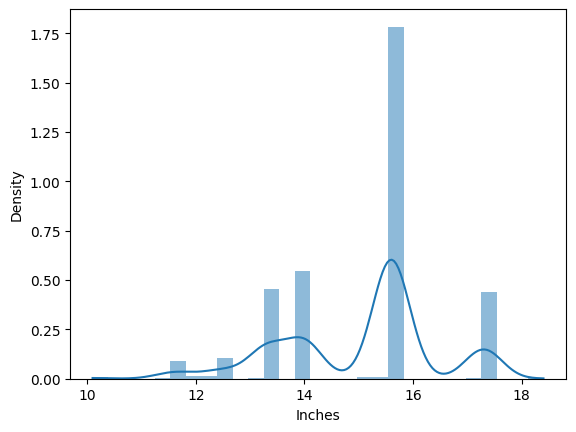

In [323]:
sns.histplot(df['Inches'],kde=True,stat="density",linewidth=0)

<AxesSubplot:xlabel='Inches', ylabel='Price'>

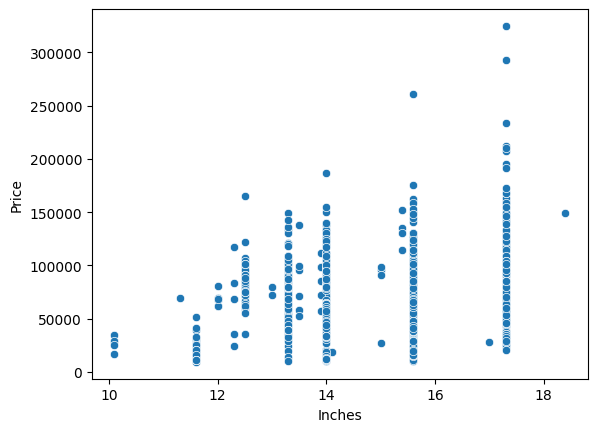

In [324]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [325]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [13]:
# feature engineering to create new columns from screen resolution column
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [14]:
df['ScreenResolution']=df['ScreenResolution'].str.replace('Touchscreen ','')

In [50]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<AxesSubplot:>

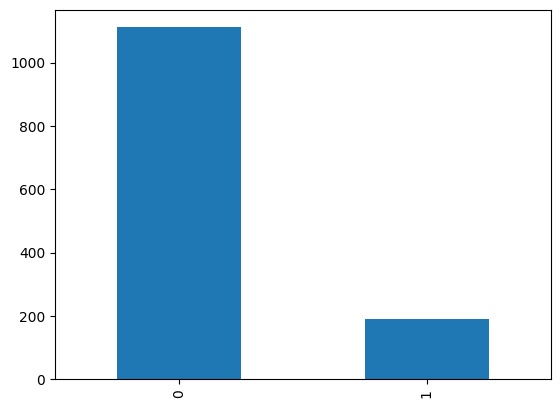

In [329]:
df['TouchScreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

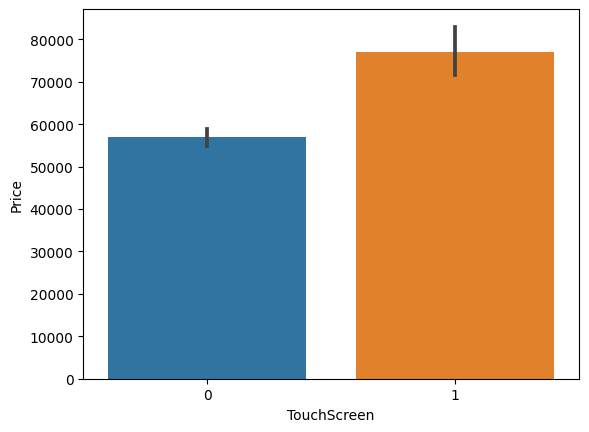

In [330]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [15]:
# making IPS column
df['IPS Panel']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [16]:
df['ScreenResolution']=df['ScreenResolution'].str.replace('IPS Panel ','')

In [53]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel
0,Apple,Ultrabook,13.3,Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:>

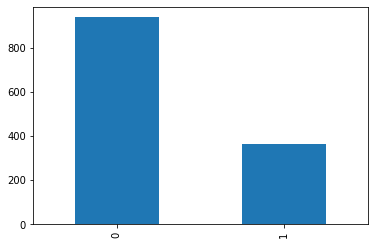

In [17]:
df['IPS Panel'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS Panel', ylabel='Price'>

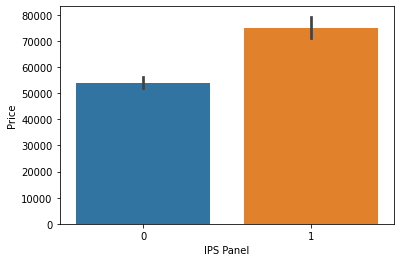

In [18]:
sns.barplot(x=df['IPS Panel'],y=df['Price'])

In [17]:
d1=df.copy()
d1.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel
0,Apple,Ultrabook,13.3,Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [18]:
temp = df['ScreenResolution'].str.split("/")
temp

0       [Retina Display 2560x1600]
1                       [1440x900]
2              [Full HD 1920x1080]
3       [Retina Display 2880x1800]
4       [Retina Display 2560x1600]
                   ...            
1298        [Full HD ,  1920x1080]
1299       [Quad HD+ ,  3200x1800]
1300                    [1366x768]
1301                    [1366x768]
1302                    [1366x768]
Name: ScreenResolution, Length: 1303, dtype: object

In [19]:
temp = df['ScreenResolution'].str.split(" ")
temp

0       [Retina, Display, 2560x1600]
1                         [1440x900]
2              [Full, HD, 1920x1080]
3       [Retina, Display, 2880x1800]
4       [Retina, Display, 2560x1600]
                    ...             
1298        [Full, HD, /, 1920x1080]
1299       [Quad, HD+, /, 3200x1800]
1300                      [1366x768]
1301                      [1366x768]
1302                      [1366x768]
Name: ScreenResolution, Length: 1303, dtype: object

In [29]:
for ele in temp:
    print(ele)

['Retina', 'Display', '2560x1600']
['1440x900']
['Full', 'HD', '1920x1080']
['Retina', 'Display', '2880x1800']
['Retina', 'Display', '2560x1600']
['1366x768']
['Retina', 'Display', '2880x1800']
['1440x900']
['Full', 'HD', '1920x1080']
['Full', 'HD', '1920x1080']
['1366x768']
['Full', 'HD', '1920x1080']
['Retina', 'Display', '2880x1800']
['Full', 'HD', '1920x1080']
['Retina', 'Display', '2304x1440']
['Retina', 'Display', '2560x1600']
['Full', 'HD', '1920x1080']
['Retina', 'Display', '2880x1800']
['Full', 'HD', '1920x1080']
['Full', 'HD', '/', '1920x1080']
['1366x768']
['Full', 'HD', '1920x1080']
['1366x768']
['Full', 'HD', '/', '1920x1080']
['Full', 'HD', '1920x1080']
['1366x768']
['1440x900']
['Full', 'HD', '1920x1080']
['Full', 'HD', '1920x1080']
['Full', 'HD', '1920x1080']
['Full', 'HD', '1920x1080']
['1366x768']
['Full', 'HD', '1920x1080']
['/', 'Quad', 'HD+', '3200x1800']
['1440x900']
['1366x768']
['1366x768']
['Full', 'HD', '1920x1080']
['1366x768']
['Full', 'HD', '1920x1080']
['F

In [20]:
x_res=[]
y_res=[]
display=[]
for ele in temp:
    if len(ele)==5:
        display.append(ele[0]+" "+ele[1]+" "+ele[2])
        a,b=ele[4].split('x')
        x_res.append(a)
        y_res.append(b)
    elif len(ele)==4:
        display.append(ele[0]+" "+ele[1])
        a,b=ele[3].split('x')
        x_res.append(a)
        y_res.append(b)
    elif len(ele)==3:
        display.append(ele[0]+" "+ele[1])
        a,b=ele[2].split('x')
        x_res.append(a)
        y_res.append(b)
    elif len(ele)==1:
        display.append('No')
        a,b=ele[0].split('x')
        x_res.append(a)
        y_res.append(b)

In [31]:
display

['Retina Display',
 'No',
 'Full HD',
 'Retina Display',
 'Retina Display',
 'No',
 'Retina Display',
 'No',
 'Full HD',
 'Full HD',
 'No',
 'Full HD',
 'Retina Display',
 'Full HD',
 'Retina Display',
 'Retina Display',
 'Full HD',
 'Retina Display',
 'Full HD',
 'Full HD',
 'No',
 'Full HD',
 'No',
 'Full HD',
 'Full HD',
 'No',
 'No',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'No',
 'Full HD',
 '/ Quad',
 'No',
 'No',
 'No',
 'Full HD',
 'No',
 'Full HD',
 'Full HD',
 'Full HD',
 'No',
 'Full HD',
 'Full HD',
 'Retina Display',
 'No',
 'Full HD',
 'Full HD',
 'No',
 'No',
 'Full HD',
 'Full HD',
 'Full HD',
 'No',
 'Full HD',
 'Full HD',
 'No',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'No',
 'No',
 'Full HD',
 'Full HD',
 'No',
 'Full HD',
 'Full HD',
 'Full HD',
 'No',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Full HD',
 'Retina Display',
 'Full HD',
 'Full HD',
 'No',
 'Full HD',
 'Full HD',
 'Full 

In [21]:
d1['Display']=display

In [22]:
d1['X_Resolution']=x_res
d1['Y_Resolution']=y_res
df['X_Resolution']=x_res
df['Y_Resolution']=y_res

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [24]:
d1.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,Display,X_Resolution,Y_Resolution
0,Apple,Ultrabook,13.3,Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Retina Display,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,No,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD,1920,1080
3,Apple,Ultrabook,15.4,Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Retina Display,2880,1800
4,Apple,Ultrabook,13.3,Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Retina Display,2560,1600


In [25]:
d1['X_Resolution']=d1['X_Resolution'].astype('int')
d1['Y_Resolution']=d1['Y_Resolution'].astype('int')

df['X_Resolution']=df['X_Resolution'].astype('int')
df['Y_Resolution']=df['Y_Resolution'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  X_Resolution      1303 non-null   int32  
 14  Y_Resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [27]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  Display           1303 non-null   object 
 14  X_Resolution      1303 non-null   int32  
 15  Y_Resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64

In [348]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
IPS Panel       0.252208
X_Resolution    0.556529
Y_Resolution    0.552809
Name: Price, dtype: float64

In [349]:
d1.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
IPS Panel       0.252208
X_Resolution    0.556529
Y_Resolution    0.552809
Name: Price, dtype: float64

In [26]:
df['PPI']=(((df['X_Resolution']**2)+(df['Y_Resolution']**2))**0.5/df['Inches']).astype('float')

In [38]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
IPS Panel       0.252208
X_Resolution    0.556529
Y_Resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

In [27]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [28]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_Resolution,Y_Resolution,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [28]:
df.drop(columns=['Inches','X_Resolution','Y_Resolution'],inplace=True)

In [31]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [356]:
print(df['Cpu'].value_counts())

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64


In [357]:
for ele in df['Cpu'].value_counts().index:
    print(ele)

Intel Core i5 7200U 2.5GHz
Intel Core i7 7700HQ 2.8GHz
Intel Core i7 7500U 2.7GHz
Intel Core i7 8550U 1.8GHz
Intel Core i5 8250U 1.6GHz
Intel Core i5 6200U 2.3GHz
Intel Core i3 6006U 2GHz
Intel Core i7 6500U 2.5GHz
Intel Core i7 6700HQ 2.6GHz
Intel Core i3 7100U 2.4GHz
Intel Core i5 7300HQ 2.5GHz
Intel Celeron Dual Core N3350 1.1GHz
Intel Celeron Dual Core N3060 1.6GHz
Intel Core i7 6600U 2.6GHz
Intel Core i3 6006U 2.0GHz
Intel Pentium Quad Core N4200 1.1GHz
Intel Core i5 7300U 2.6GHz
Intel Core i7 7600U 2.8GHz
Intel Pentium Quad Core N3710 1.6GHz
AMD A9-Series 9420 3GHz
Intel Core i5 6300U 2.4GHz
Intel Celeron Dual Core N3050 1.6GHz
Intel Core i7 6820HK 2.7GHz
Intel Core i3 6100U 2.3GHz
Intel Core i3 7130U 2.7GHz
Intel Core i7 6820HQ 2.7GHz
Intel Core i5 6300HQ 2.3GHz
Intel Core i7 7820HK 2.9GHz
AMD A6-Series 9220 2.5GHz
Intel Core i7 7820HQ 2.9GHz
Intel Core M 6Y75 1.2GHz
Intel Atom x5-Z8350 1.44GHz
AMD A12-Series 9720P 3.6GHz
Intel Celeron Quad Core N3450 1.1GHz
Intel Core i7 7Y75 1

In [29]:
######
## No extra things for now only studying the df
df['CPU Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[:3]))

In [63]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [30]:
def get_cpu(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD'


In [31]:
df['CPU Type']=df['CPU Name'].apply(get_cpu)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU Name,CPU Type
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

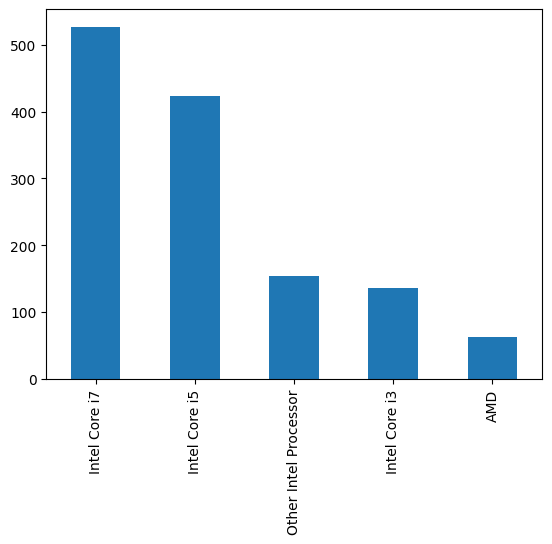

In [367]:
df['CPU Type'].value_counts().plot(kind='bar')

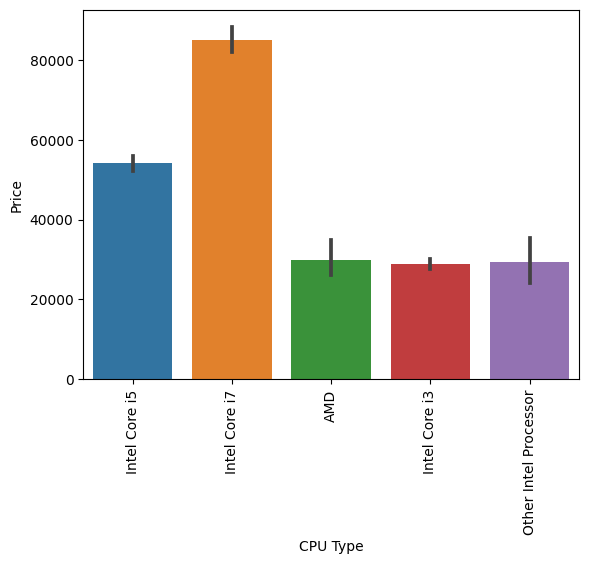

In [368]:
sns.barplot(x=df['CPU Type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
df.drop(columns=['Cpu','CPU Name'],inplace=True)

<AxesSubplot:>

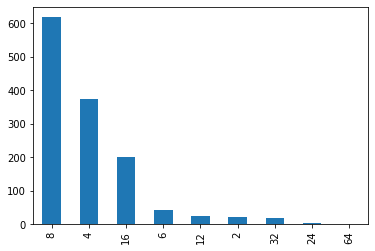

In [33]:
df['Ram'].value_counts().plot(kind='bar')

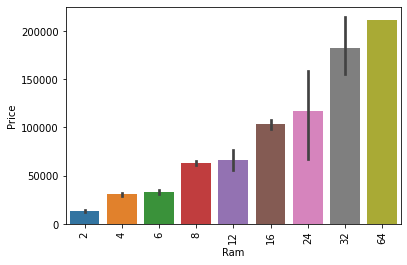

In [68]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
for ele in df['Memory']:
    if ele 

In [70]:
### Transforming the memory columns
ele=df['Memory'][0]
ele

'128GB SSD'

In [34]:
hdd=[]
ssd=[]
hybrid=[]
flash=[]

for ele in df['Memory']:
    a=ele.split(' + ')
    if len(a)==2:
        b=a[0].split()
        c=a[1].split()
        if len(b)==3:
            flash.append(b[0])
            hdd.append(c[0])
            ssd.append(0)
            hybrid.append(0)
        else:
            if c[1]=='SSD':
                ssd.append(b[0]+c[0])
                hdd.append(0)
                flash.append(0)
                hybrid.append(0)
            elif c[1]=='HDD':
                if c[0]=='1.0TB':
                    ssd.append(b[0])
                    hdd.append('1TB')
                    hybrid.append(0)
                    flash.append(0)
                else:
                    ssd.append(b[0])
                    hdd.append(c[0])
                    hybrid.append(0)
                    flash.append(0)
            elif c[1]=='Hybrid':
                ssd.append(b[0])
                hybrid.append(c[0])
                hdd.append(0)
                flash.append(0)
    else:
        b=a[0].split()
        if len(b)==3:
            flash.append(b[0])
            hdd.append(0)
            ssd.append(0)
            hybrid.append(0)
        else:
            if b[1]=='SSD':
                ssd.append(b[0])
                hybrid.append(0)
                flash.append(0)
                hdd.append(0)
            elif b[1]=='HDD':
                if b[0]=='1.0TB':
                    hdd.append('1TB')
                    hybrid.append(0)
                    flash.append(0)
                    ssd.append(0)
                else:
                    hdd.append(b[0])
                    hybrid.append(0)
                    flash.append(0)
                    ssd.append(0)
            elif b[1]=='Hybrid':
                hybrid.append(b[0])
                flash.append(0)
                ssd.append(0)
                hdd.append(0)

In [301]:
# not added this curently
df['HDD']=hdd
df['SSD']=ssd
df['Hybrid']=hybrid
df['Flash_Storage']=flash

In [39]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU Type
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [379]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   TouchScreen  1303 non-null   int64  
 9   IPS Panel    1303 non-null   int64  
 10  PPI          1303 non-null   float64
 11  CPU Type     1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 112.1+ KB


In [42]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU Type
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [35]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('1.0TB','1TB')
df['Memory']=df['Memory'].str.replace('TB','000')
new=df['Memory'].str.split("+",n=1,expand=True)

C:\Users\Asus Laptop\AppData\Local\Temp\ipykernel_13940\2881696875.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory']=df['Memory'].str.replace('1.0TB','1TB')


In [36]:
new=df['Memory'].str.split("+",n=1,expand=True)
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [37]:
df['left']=new[0]
df['left']=df['left'].str.strip()

df['right']=new[1]

df["left_hdd"] = df["left"].apply(lambda x: 1 if "HDD" in x else 0)
df["left_ssd"] = df["left"].apply(lambda x: 1 if "SSD" in x else 0)
df["left_hybrid"] = df["left"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["left_flash"] = df["left"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['left'] = df['left'].str.replace(r'\D', '')

df["right"].fillna("0", inplace = True)

df["right_hdd"] = df["right"].apply(lambda x: 1 if "HDD" in x else 0)
df["right_ssd"] = df["right"].apply(lambda x: 1 if "SSD" in x else 0)
df["right_hybrid"] = df["right"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["right_flash"] = df["right"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['right'] = df['right'].str.replace(r'\D', '')

df["left"] = df["left"].astype(int)
df["right"] = df["right"].astype(int)

df["HDD"]=(df["left"]*df["left_hdd"]+df["right"]*df["right_hdd"])
df["SSD"]=(df["left"]*df["left_ssd"]+df["right"]*df["right_ssd"])
df["Hybrid"]=(df["left"]*df["left_hybrid"]+df["right"]*df["right_hybrid"])
df["Flash_Storage"]=(df["left"]*df["left_flash"]+df["right"]*df["right_flash"])

df.drop(columns=['left', 'right', 'left_hdd', 'left_ssd', 'left_hybrid',
       'left_flash', 'right_hdd', 'right_ssd', 'right_hybrid',
       'right_flash'],inplace=True)

C:\Users\Asus Laptop\AppData\Local\Temp\ipykernel_13940\2060016450.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['left'] = df['left'].str.replace(r'\D', '')
C:\Users\Asus Laptop\AppData\Local\Temp\ipykernel_13940\2060016450.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['right'] = df['right'].str.replace(r'\D', '')


In [38]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU Type,HDD,SSD,Hybrid,Flash_Storage
414,Asus,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.27,49443.8400,1,1,165.632118,Intel Core i5,0,256,0,0
230,Asus,Notebook,4,1000 HDD,Intel HD Graphics 620,Windows 10,2.37,21258.1872,0,0,100.454670,Intel Core i3,1000,0,0,0
798,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.38,71874.7200,1,1,158.482530,Intel Core i7,0,256,0,0
219,Dell,2 in 1 Convertible,16,512 SSD,Intel UHD Graphics 620,Windows 10,1.62,68145.1200,1,0,165.632118,Intel Core i7,0,512,0,0
440,Lenovo,Notebook,8,1000 HDD,AMD Radeon R4,Windows 10,2.80,27652.3200,0,0,106.113062,AMD,1000,0,0,0


In [39]:
df.drop(columns=['Memory'],inplace=True)

In [40]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS Panel        0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [41]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [42]:
### GPU Column
# Problem : Too many categories
df['Gpu'].value_counts()[:30]

Intel HD Graphics 620           281
Intel HD Graphics 520           185
Intel UHD Graphics 620           68
Nvidia GeForce GTX 1050          66
Nvidia GeForce GTX 1060          48
Nvidia GeForce 940MX             43
AMD Radeon 530                   41
Intel HD Graphics 500            39
Intel HD Graphics 400            37
Nvidia GeForce GTX 1070          30
Intel HD Graphics                29
Nvidia GeForce GTX 1050 Ti       28
AMD Radeon R5 M430               22
Nvidia GeForce 930MX             20
AMD Radeon 520                   17
Nvidia GeForce MX150             15
Intel HD Graphics 515            15
Intel HD Graphics 615            14
AMD Radeon R7 M445               14
Nvidia GeForce GTX 960M          14
Nvidia GeForce 920MX             13
Intel HD Graphics 505            12
AMD Radeon R5                    11
Nvidia GeForce GTX 980M          10
Intel HD Graphics 405             9
Nvidia Quadro M1200               9
AMD Radeon R5 M420                8
Intel Iris Plus Graphics 640

In [43]:
df['GPU Brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [54]:
df['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU Brand, dtype: int64

In [44]:
df=df[df['GPU Brand']!='ARM']

In [45]:
df['GPU Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: GPU Brand, dtype: int64

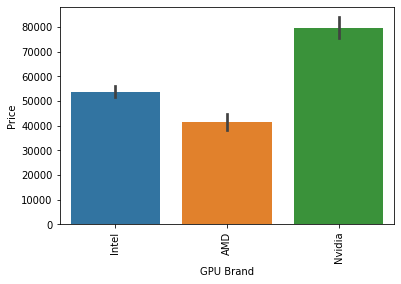

In [57]:
sns.barplot(x=df['GPU Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
df.drop(columns=['Gpu'],inplace=True)

In [55]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU Type,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [56]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

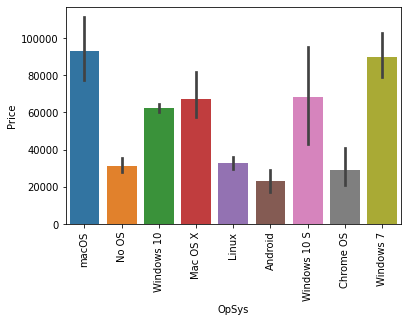

In [57]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
def cat(op):
    if op=='Windows 10' or op=='Windows 7' or op=='Windows 10 S':
        return 'Windows'
    elif op=='macOS' or op=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [48]:
df['os']=df['OpSys'].apply(cat)

In [49]:
df.drop(columns=['OpSys'],inplace=True)

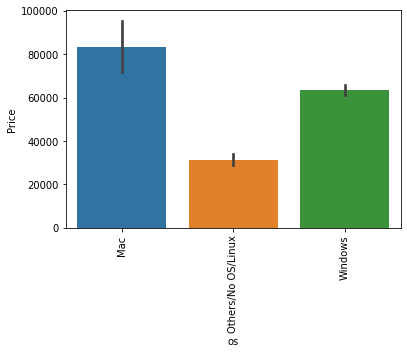

In [107]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Density'>

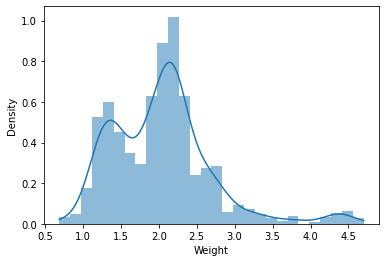

In [108]:
sns.histplot(df['Weight'],kde=True,stat="density",linewidth=0)

<AxesSubplot:xlabel='Weight', ylabel='Price'>

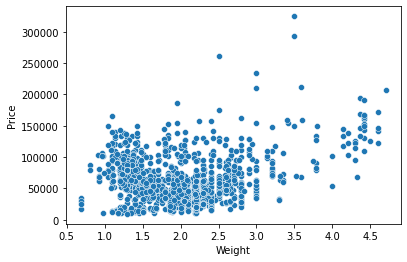

In [61]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [62]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS Panel      0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

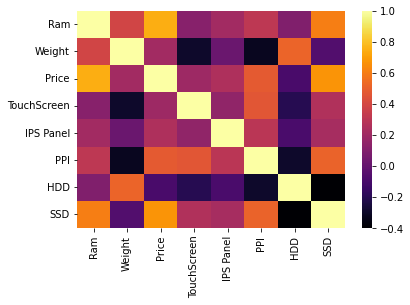

In [63]:
sns.heatmap(df.corr(),cmap='inferno')

<AxesSubplot:>

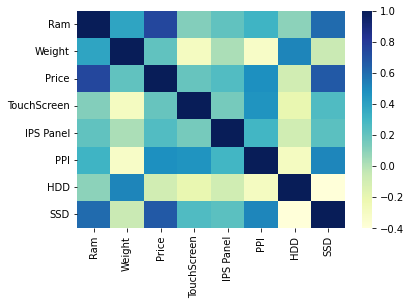

In [64]:
sns.heatmap(df.corr(),cmap='YlGnBu')

<AxesSubplot:>

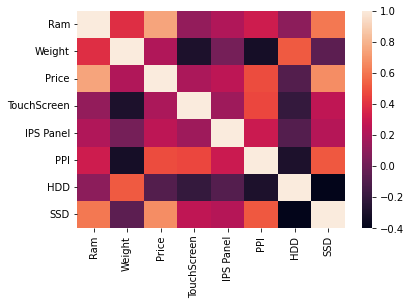

In [65]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price', ylabel='Density'>

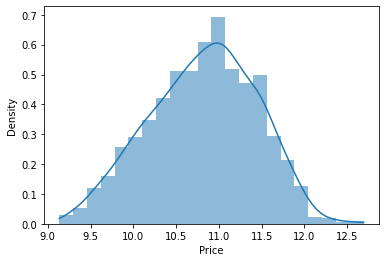

In [116]:
# As our target column is somewhat skewed
# so to convert to normal we can do logarithmic transformation
sns.histplot(np.log(df['Price']),kde=True,stat="density",linewidth=0)

In [5]:
df.to_csv('cleaned.csv',index=False)

In [6]:
df=pd.read_csv("cleaned.csv")
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS Panel,PPI,CPU Type,HDD,SSD,GPU Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [7]:
# Splitting with X and Y
X=df.drop(columns=['Price'])
Y=np.log(df['Price'])

In [8]:
X

,Company,TypeName,Ram,Weight,TouchScreen,IPS Panel,PPI,CPU Type,HDD,SSD,GPU Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1298,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1299,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1300,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [9]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1297    10.433899
1298    11.288115
1299     9.409283
1300    10.614129
1301     9.886358
Name: Price, Length: 1302, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

# USe One Hot Encoding for the categorical values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Some models for predictions
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [11]:
# Linear Regression

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=2)

step1 = ColumnTransformer(transformers=[
    ('col_tranform',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("R2 Score",r2_score(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

R2 Score 0.8073277450000818
Mean Absolute Error 0.21017827953341123


In [12]:
# Ridge Regression

step1 = ColumnTransformer(transformers=[
    ('col_tranform',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("R2 Score",r2_score(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

R2 Score 0.8129022478290066
Mean Absolute Error 0.2095562933333683


In [13]:
# Lasso Regression

step1 = ColumnTransformer(transformers=[
    ('col_tranform',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.00048)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("R2 Score",r2_score(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

R2 Score 0.8099891998502835
Mean Absolute Error 0.2095863595130061


In [14]:
# KNN

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8023698194974369
MAE 0.19290084529951357


In [15]:
# Decision Tree

step1 = ColumnTransformer(transformers=[
    ('col_tranform',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("R2 Score",r2_score(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

R2 Score 0.8469697056225558
Mean Absolute Error 0.18116877480039845


In [16]:
# SVM

step1 = ColumnTransformer(transformers=[
    ('col_tranform',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("R2 Score",r2_score(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

R2 Score 0.8082751376623412
Mean Absolute Error 0.20241493624341786


In [17]:
# Random Forest

step1 = ColumnTransformer(transformers=[
    ('col_tranform',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=90,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.65,
                              max_depth=15)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print("R2 Score",r2_score(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

R2 Score 0.8895123383739496
Mean Absolute Error 0.15760636838669784


In [18]:
# Extra Trees Regressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8743576019640713
MAE 0.1606945068551793


In [19]:
# Ada Boost

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7858088921023904
MAE 0.23533770160532094


In [20]:
# XG Boost

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=38,max_depth=5,learning_rate=0.5)


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8841522967753233
MAE 0.16351964822807877


In [52]:
################
##### Some Multiple models
# Voting Regressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('et',et)],weights=[5,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8908288532949126
MAE 0.1567238005537584


In [53]:
### Try Stacking
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('et', ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8853310559139499
MAE 0.163385913498397


In [46]:
##### EXPORTING THE MODEL

import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [151]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS Panel,PPI,CPU Type,HDD,SSD,GPU Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [35]:
import xgboost
print(xgboost.__version__)
##### 2 ####

1.6.0


In [40]:
## dumping files for python flask server
import pickle
with open('model.pickle','wb') as f:
    pickle.dump(pipe,f)

In [43]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))